# Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dataset Loading

1. The task in MNIST digit classification is to correctly classify handwritten digits into one of these 10 categories.
2. Each sample in the dataset is a `grayscale` image of `size 28×28` pixels.
3. Classes: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#x_train[0]

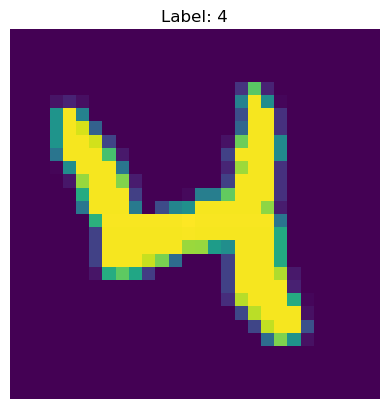

In [4]:
plt.imshow(x_train[20])
plt.title(f"Label: {y_train[20]}")
plt.axis('off')
plt.show()

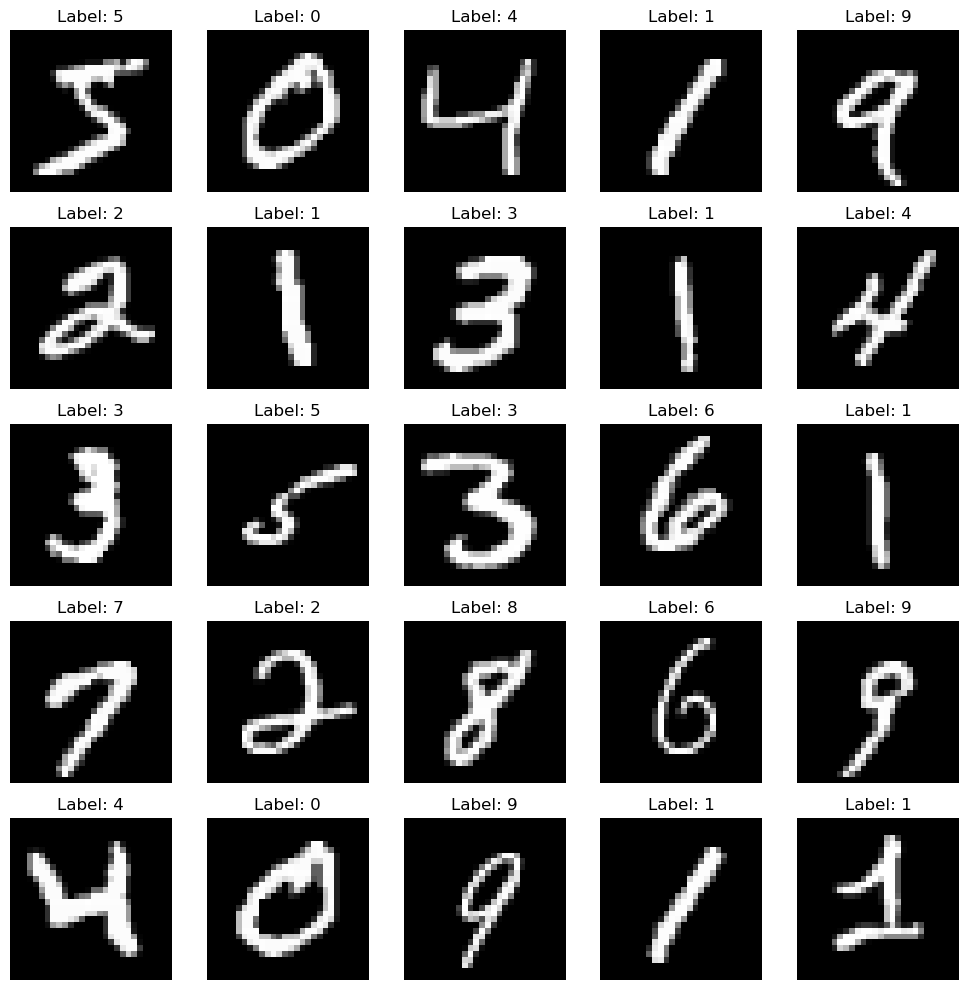

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Normalization

1. Reshaping prepares the data for fully connected layers in a neural network.
2. Normalization ensures faster and more stable training by scaling input values.

In [6]:
x_train = x_train.reshape(-1, 28*28) / 255.0
x_test = x_test.reshape(-1, 28*28) / 255.0  

# Define the Neural Network Architecture

In [7]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),  # Input layer
    Dense(64, activation='relu'),                         # Hidden layer
    Dense(10, activation='softmax')                       # Output layer
])

# Compile the Model

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Train the Model

1. `Batch Size:`A batch size of 32 means that 32 samples are used to compute the gradient and update the model weights before the next batch of 32 samples is processed. 
2. `Number of Epochs:` The number of times the entire training dataset is passed through the model.

In [9]:
model.fit(x_train, 
          y_train, 
          epochs=10, 
          batch_size=32, 
          validation_split=0.25)

Epoch 1/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2758 - accuracy: 0.9190 - val_loss: 0.1612 - val_accuracy: 0.9511
Epoch 2/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.1137 - accuracy: 0.9649 - val_loss: 0.1243 - val_accuracy: 0.9629
Epoch 3/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0775 - accuracy: 0.9764 - val_loss: 0.1067 - val_accuracy: 0.9675
Epoch 4/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0548 - accuracy: 0.9833 - val_loss: 0.1104 - val_accuracy: 0.9681
Epoch 5/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0451 - accuracy: 0.9858 - val_loss: 0.1033 - val_accuracy: 0.9716
Epoch 6/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0349 - accuracy: 0.9891 - val_loss: 0.0959 - val_accuracy: 0.9753
Epoch 7/10
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0288 - accuracy: 0.9908 - val_loss: 0.1189 - val_accuracy:

# Evaluate the model's performance on test data

In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\n Test Accuracy: {test_accuracy}")
print(f"\n Test Loss: {test_loss}")

313/313 [==============================] - 0s 710us/step - loss: 0.0948 - accuracy: 0.9754

 Test Accuracy: 0.9753999710083008

 Test Loss: 0.09480001777410507


# Predict on the test set

In [11]:
y_pred = model.predict(x_test)
y_pred

313/313 [==============================] - 0s 595us/step


array([[2.3049584e-10, 1.6923958e-09, 2.5531227e-07, ..., 9.9999809e-01,
        2.6764777e-10, 4.7362430e-08],
       [8.2468520e-16, 7.1396141e-07, 9.9999928e-01, ..., 1.9155427e-11,
        1.9471969e-11, 1.1040537e-19],
       [6.9814256e-08, 9.9981195e-01, 1.4939821e-04, ..., 1.0051268e-05,
        2.2389811e-05, 6.7983734e-07],
       ...,
       [1.7237378e-14, 1.1910835e-12, 6.0805266e-16, ..., 1.0771628e-09,
        1.5349963e-11, 3.3448870e-09],
       [1.5790397e-09, 1.4234671e-16, 3.6379311e-17, ..., 4.5356421e-15,
        7.5036226e-09, 6.6876831e-17],
       [2.9015216e-11, 4.1433470e-17, 1.5920690e-15, ..., 1.4040187e-18,
        1.3424983e-16, 8.5682379e-18]], dtype=float32)

In [12]:
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_pred_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

# Compute the confusion matrix

In [13]:
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 972    0    1    0    0    1    1    0    4    1]
 [   1 1121    4    1    0    0    4    1    3    0]
 [   3    0 1020    0    0    0    2    2    4    1]
 [   0    0   10  984    1    5    0    5    4    1]
 [   0    0    3    0  966    0    6    1    0    6]
 [   2    0    0   19    1  850    9    1    8    2]
 [   7    2    1    1    2    2  940    0    3    0]
 [   1    3   17    2    0    0    0  994    5    6]
 [   6    1    8    4    2    5    0    3  944    1]
 [   1    2    2   10   12    7    0    5    7  963]]


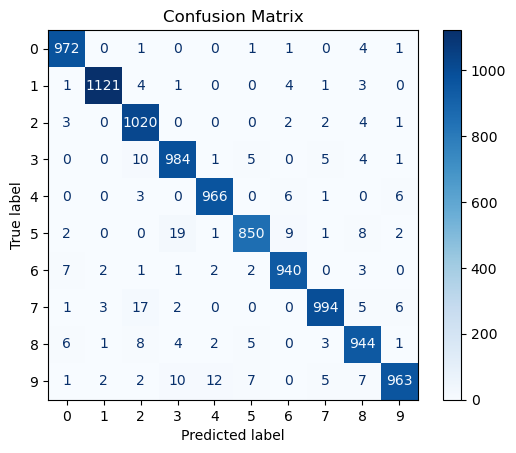

In [14]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Save the model

In [15]:
model.save('nn_model.h5')

# Load model

In [16]:
loaded_model = tf.keras.models.load_model('nn_model.h5')
loaded_model

# Prediction

1/1 [==============================] - 0s 44ms/step
True Label: 6
Predicted Label: 6


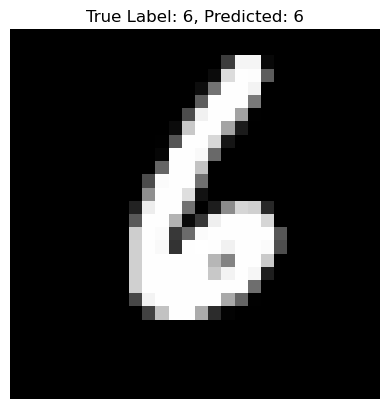

In [17]:
random_index = np.random.randint(0, len(x_test))
random_image = x_test[random_index]
random_label = y_test[random_index]

random_image_reshaped = random_image.reshape(1, 28 * 28) 
predictions = loaded_model.predict(random_image_reshaped) 
predicted_label = np.argmax(predictions)

print(f"True Label: {random_label}")
print(f"Predicted Label: {predicted_label}")

plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {random_label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()